# EEG Data Analysis: Time-Frequency 

    Time Seris Analysis

Opening raw data file /Users/jacobloranger/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 41699  =      0.000 ...   277.709 secs...
Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    0.1s finished


0 bad epochs dropped
Using matplotlib as 2D backend.
Using data from preloaded Raw for 20 events and 106 original time points ...


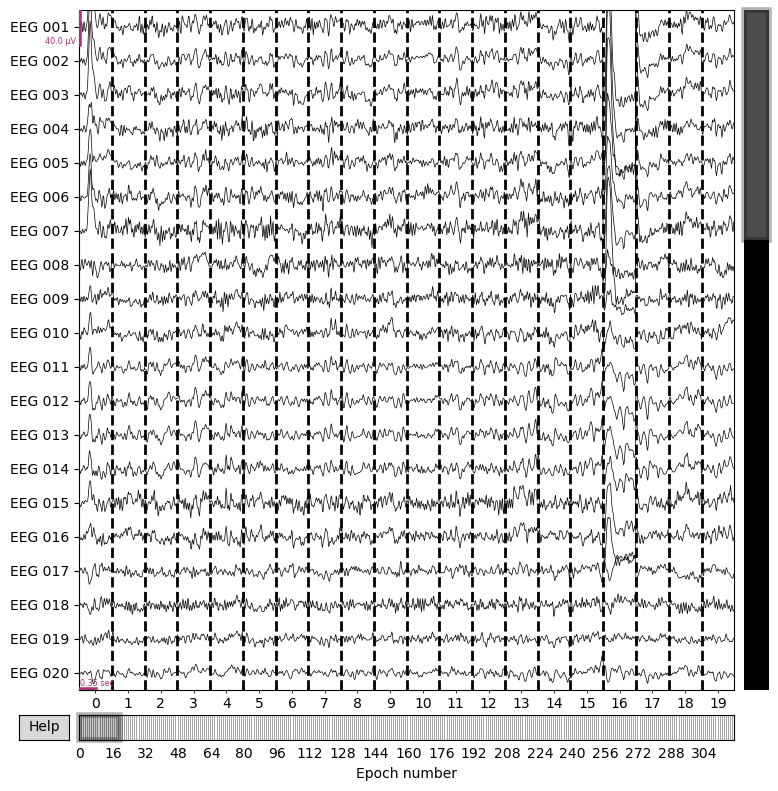

Number of events,319
Events,1: 722: 733: 7332: 164: 705: 15
Time range,-0.200 – 0.499 sec
Baseline,-0.200 – 0.000 sec


In [1]:
import numpy as np 
import mne 
import os
import matplotlib.pyplot as plt

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (sample_data_folder / 'MEG' / 'sample' /
                        'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)
raw = raw.pick_types(eeg = True, meg = False, eog = False, stim=True, exclude = 'bads')
raw.filter(1,20)
raw.info


events = mne.find_events(raw)
epochs = mne.Epochs(raw, events)

epochs.plot()
epochs

In [2]:
# Separate and average the ERPs (event related potentials) into Evoked

one = epochs["1"].average()
two = epochs["2"].average()
three = epochs["3"].average()
three_two = epochs["32"].average()
four = epochs["4"].average()
five = epochs["5"].average()

epochs['1'].get_data().shape


Using data from preloaded Raw for 72 events and 106 original time points ...


(72, 68, 106)

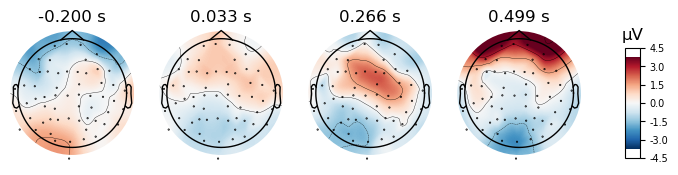

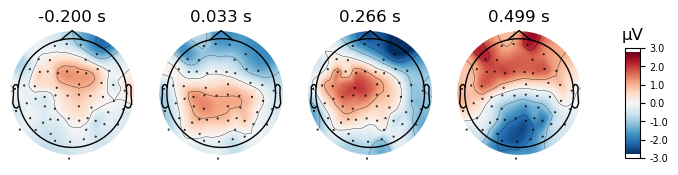

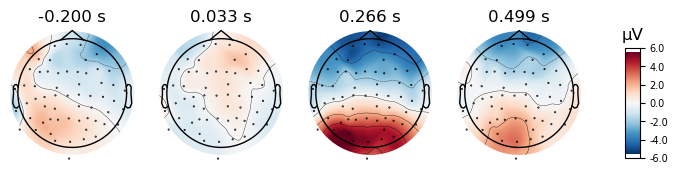

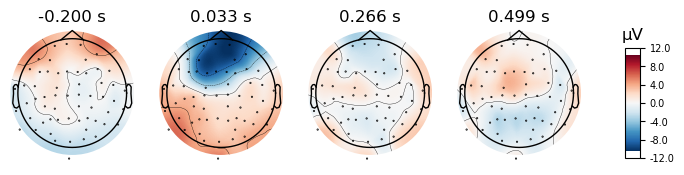

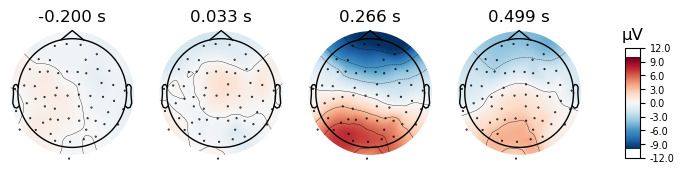

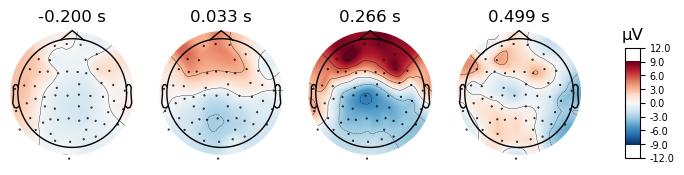

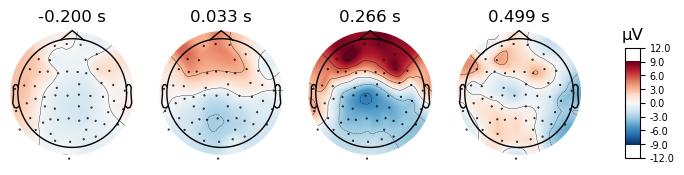

In [3]:
#Visualization of the 5 averaged ERPs 

one.plot_topomap()
two.plot_topomap()
three.plot_topomap()
three_two.plot_topomap()
four.plot_topomap()
five.plot_topomap()

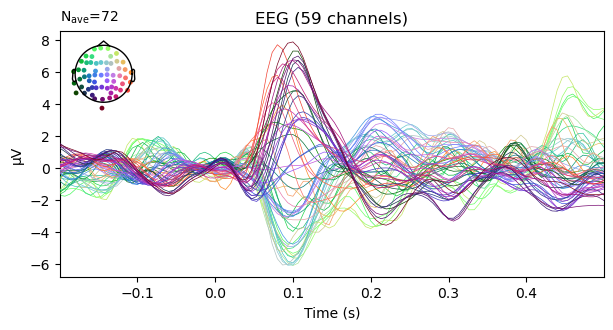

Projections have already been applied. Setting proj attribute to True.


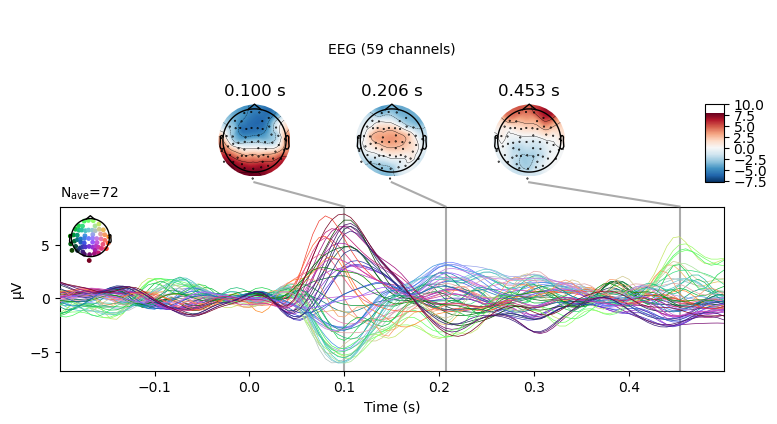

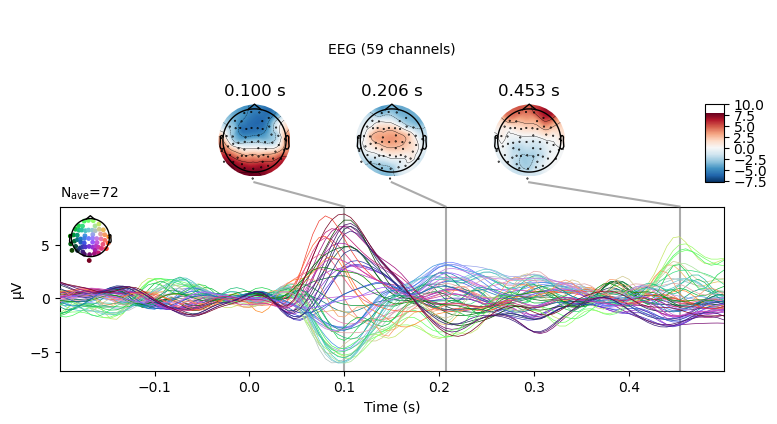

In [4]:
one.plot()
one.plot_joint()

Projections have already been applied. Setting proj attribute to True.


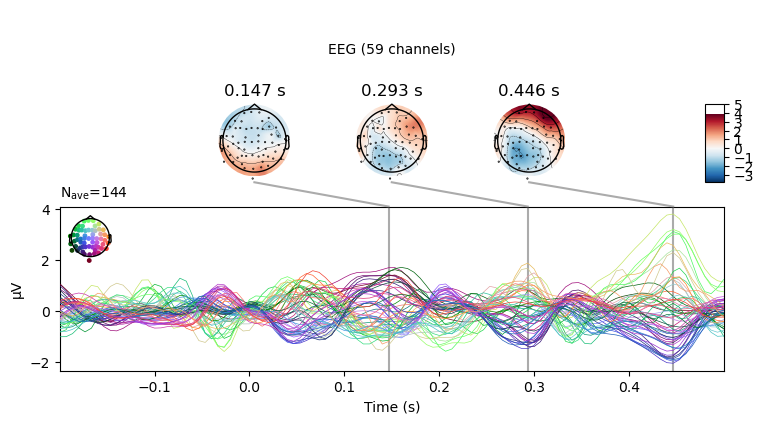

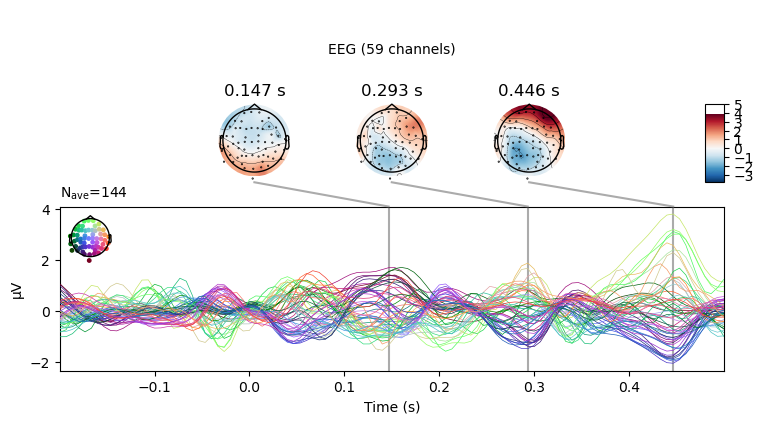

In [5]:
# Merge evoked data by substraction
diff = mne.combine_evoked((one, -two), weights='equal' )
diff.plot_joint()

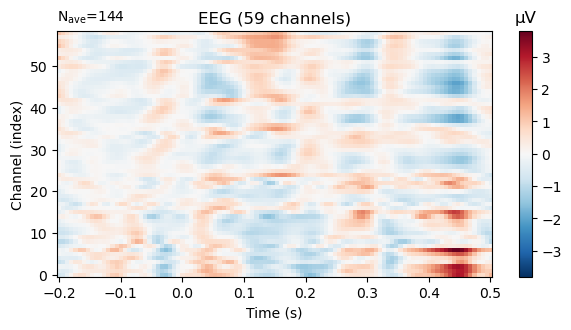

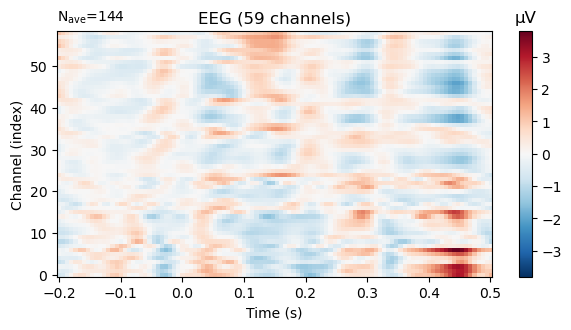

In [6]:
diff.plot_image()

In [7]:
# Make regions of interest for easier data visualization
rois = mne.channels.make_1020_channel_selections(diff.info, midline= "EEG 030")

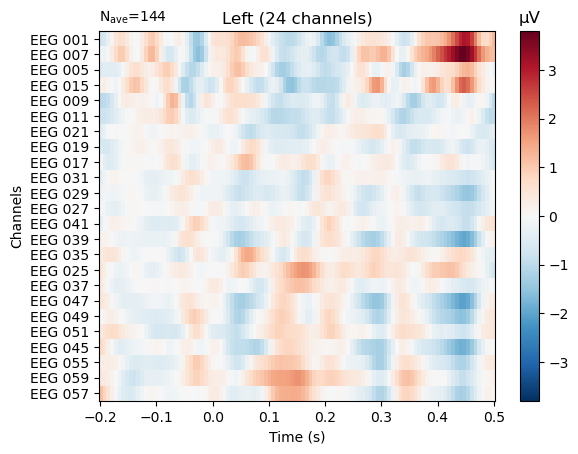

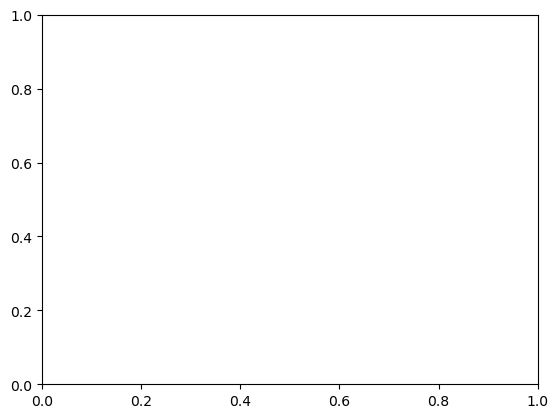

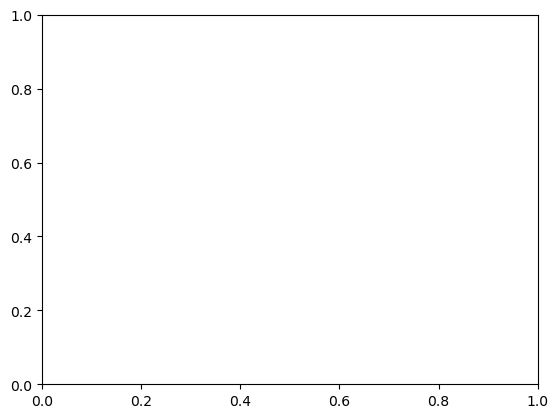

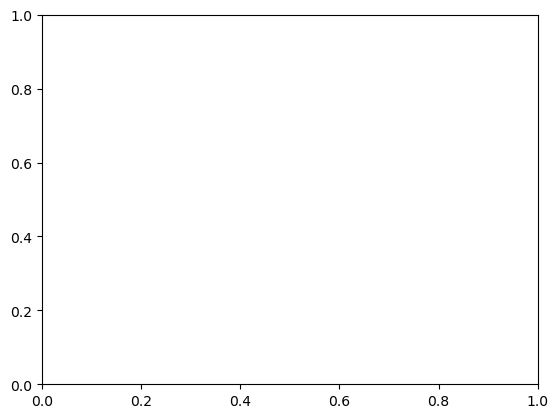

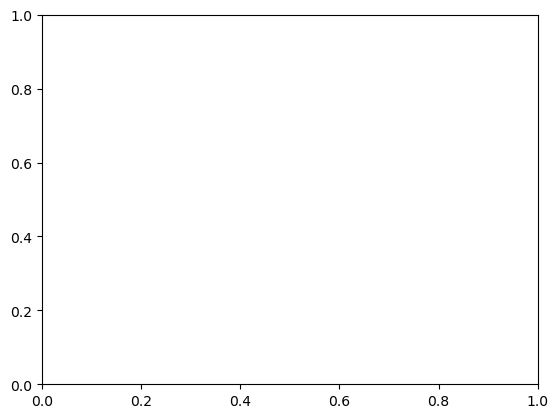

In [8]:
diff.plot_image(group_by=rois, show_names='all');

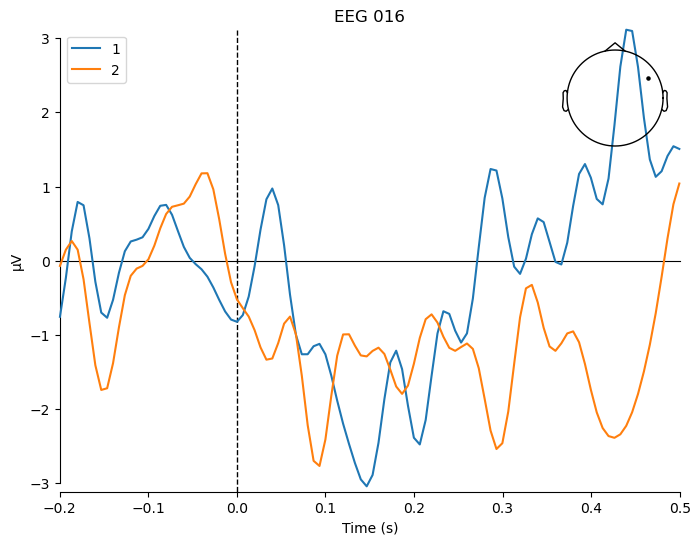

[<Figure size 800x600 with 2 Axes>]

In [9]:
# Allows you to compare data of two different ERPs at the same sensor location

mne.viz.plot_compare_evokeds({"1": one, "2": two}, picks=[15])

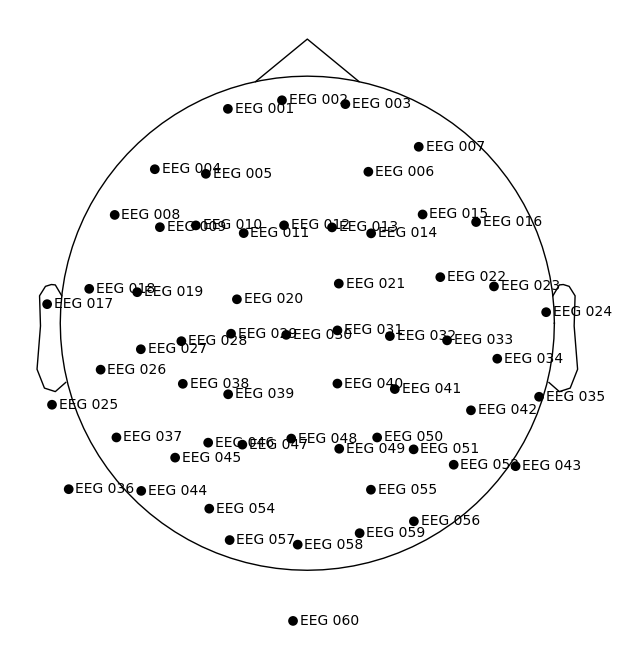

In [10]:
one.plot_sensors(show_names = True);

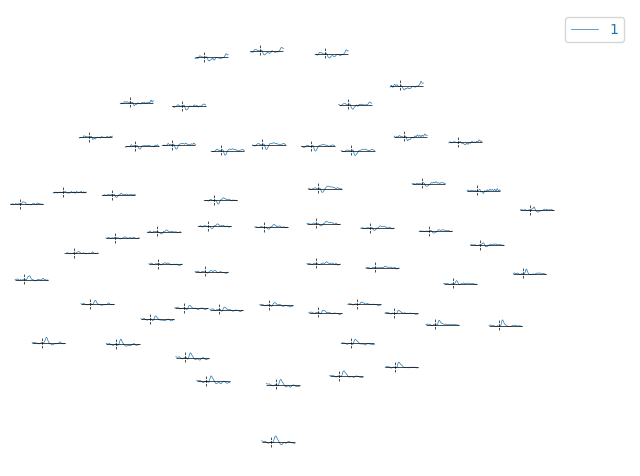

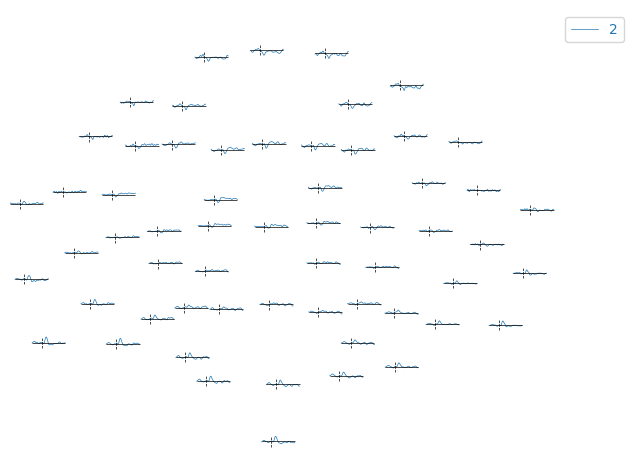

In [11]:
one.plot_topo()
two.plot_topo();

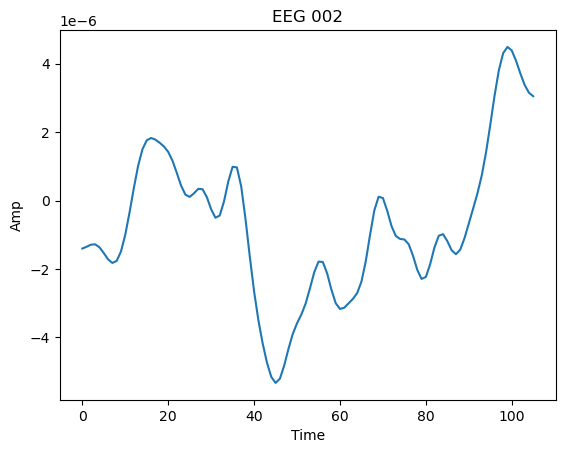

In [12]:
x = one.data
ch_names = one.info["ch_names"]
channel = 'EEG 002'
ch_index = [i for i, j in enumerate(ch_names) if j == channel]

plt.plot(x[ch_index[0],:])
plt.title(channel)
plt.ylabel("Amp")
plt.xlabel("Time")
plt.show()

    Frequency Seris Analysis

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Using data from preloaded Raw for 319 events and 106 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/Users/jacobloranger/opt/anaconda3/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


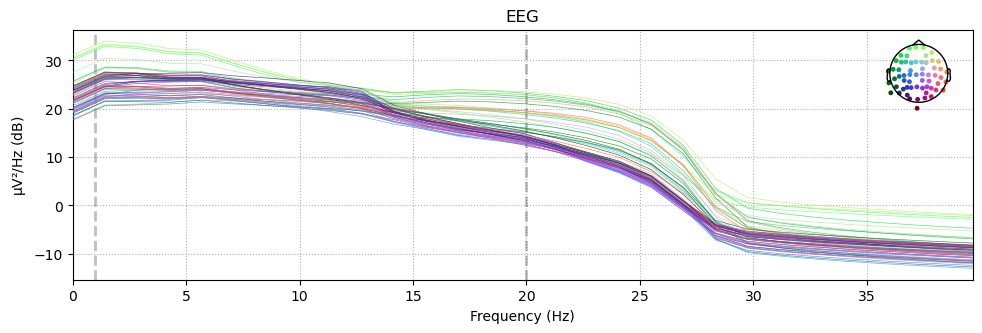

In [13]:
epochs.plot_psd(fmax=40,fmin=0)

In [14]:
freqs = list(range(3,10))
tfr_one = mne.time_frequency.tfr_morlet(epochs["1"], freqs, 1, return_itc = False)
tfr_two = mne.time_frequency.tfr_morlet(epochs["2"], freqs, 1, return_itc = False)

Using data from preloaded Raw for 72 events and 106 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using data from preloaded Raw for 73 events and 106 original time points ...


[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    0.5s finished


No baseline correction applied
No baseline correction applied


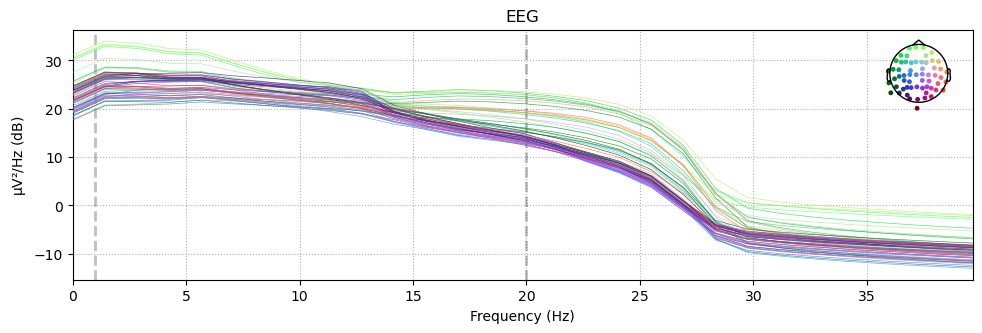

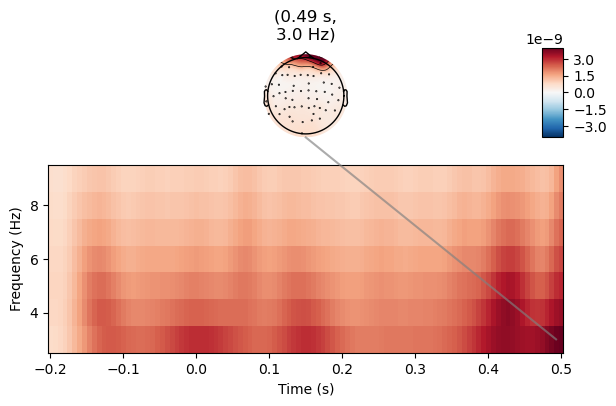

In [15]:
tfr_contrast = mne.combine_evoked((tfr_one, tfr_two), weights='equal' )
tfr_contrast.plot_joint();

No baseline correction applied


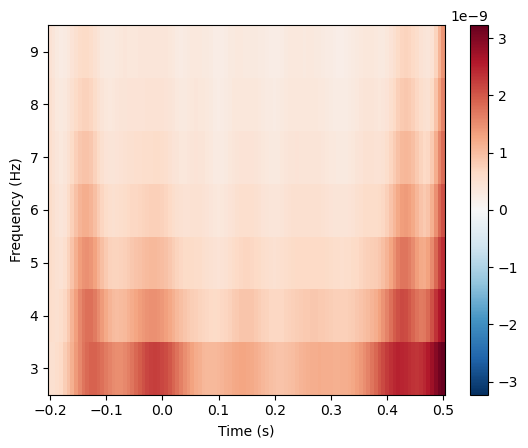

[<Figure size 640x480 with 2 Axes>]

In [16]:
tfr_contrast.plot(picks=["EEG 001"])